In [2]:
# libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [38]:
# connecting to table in DB

# calling in the tables 

conn = sqlite3.connect(r"C:\Users\Epicm\Desktop\data_bases\dbs\planes\plane1.db")
cursor = conn.cursor()

# calling the flights table and saving as a df

query = '''

SELECT * from flights_cleaned

'''

df = pd.read_sql_query(query, conn)
conn.close()

df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   airline                                       10681 non-null  object 
 1   source                                        10681 non-null  int64  
 2   destination                                   10681 non-null  float64
 3   total_stops                                   10681 non-null  int64  
 4   price                                         10681 non-null  int64  
 5   day                                           10681 non-null  int64  
 6   month                                         10681 non-null  int64  
 7   year                                          10681 non-null  int64  
 8   arv_hour                                      10681 non-null  int64  
 9   arv_min                                       10681 non-null 

(None, None)

In [ ]:
"""
Exploratory Data Analysis 
"""

In [ ]:
"""
1. General Information 
"""

In [40]:
df.shape

(10681, 35)

In [ ]:
# number of rows: 10,681
# number of columns: 34

In [ ]:
"""
2. Data Types and Non-Null Counts
"""

In [ ]:
# all columns are non-null

In [41]:
# Organize features by their data type

features_by_type = df.columns.to_series().groupby(df.dtypes).groups

organized_features = {str(dtype): list(columns) for dtype, columns in features_by_type.items()}

# Display the organized features
for dtype, columns in organized_features.items():
    print(f"Data Type: {dtype}")
    print(f"Columns: {columns}")
    print()

Data Type: int64
Columns: ['source', 'total_stops', 'price', 'day', 'month', 'year', 'arv_hour', 'arv_min', 'dep_hour', 'dep_min', 'dur_hour', 'dur_min', 'total_dur', 'start', 'stop_1', 'stop_2', 'stop_3', 'stop_4', 'stop_5', 'route_num', 'additional_info_1 long layover', 'additional_info_1 short layover', 'additional_info_2 long layover', 'additional_info_business class', 'additional_info_change airports', 'additional_info_in-flight meal not included', 'additional_info_no check-in baggage included', 'additional_info_no info', 'additional_info_red-eye flight', '2_short_layovers']

Data Type: float64
Columns: ['destination', 'total_air_time', 'layover_time', 'additional_info_2 short layover']

Data Type: object
Columns: ['airline']



In [ ]:
# datatypes consist of...
# 
# integers, floats, and objects

In [ ]:
"""
3.) Missing Values 
"""

In [6]:
# checking for missing values

df.isnull().sum()

airline                                             0
source                                              0
destination                                         0
total_stops                                         0
price                                               0
day                                                 0
month                                               0
year                                                0
arv_hour                                            0
arv_min                                             0
dep_hour                                            0
dep_min                                             0
dur_hour                                            0
dur_min                                             0
total_dur                                           0
start                                               0
stop_1                                              0
stop_2                                              0
stop_3                      

In [8]:
# handling missing values 
# since it was a feature engineering mistake I will just go ahead and drop this column

df = df.drop('additional_info_2 short layover', axis=1)
df.head()

,airline,source,destination,total_stops,price,day,month,year,arv_hour,arv_min,...,additional_info_1 long layover,additional_info_1 short layover,additional_info_2 long layover,additional_info_business class,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_no info,additional_info_red-eye flight,2_short_layovers
0,indigo,0,3.0,1,3897,24,3,2019,1,10,...,0,0,0,0,0,0,0,1,0,0
1,air india,2,0.0,3,7662,1,5,2019,13,15,...,0,0,0,0,0,0,0,1,0,0
2,jet airways,3,10.0,3,13882,9,6,2019,4,25,...,0,0,0,0,0,0,0,1,0,0
3,indigo,2,0.0,2,6218,12,5,2019,23,30,...,0,1,0,0,0,0,0,1,0,1
4,indigo,0,3.0,2,13302,1,3,2019,21,35,...,0,1,0,0,0,0,0,1,0,1


In [ ]:
"""
4.) Statistical Summaries 
"""

In [42]:
# numerical features

num_features = ['price', 'total_dur','total_air_time', 'layover_time']

num_describe = df[num_features].describe()

num_describe

,price,total_dur,total_air_time,layover_time
count,10681.000000,10681.000000,10681.000000,10681.000000
mean,9086.443123,643.080236,228.940819,414.139417
std,4611.075357,507.816377,66.098261,461.558499
min,1759.000000,75.000000,87.346885,-76.451172
25%,5277.000000,170.000000,169.061918,2.653115
50%,8372.000000,520.000000,246.406620,263.593380
75%,12373.000000,930.000000,265.718060,677.047902
max,79512.000000,2860.000000,531.526935,2566.596489


In [43]:
# categorical features 

cat_features = ['airline', 'source', 'destination', 'start', 'stop_1','stop_2','stop_3','stop_4','stop_5', 'additional_info_1 short layover', '2_short_layovers', 'additional_info_2 long layover', 'additional_info_1 long layover', 'additional_info_change airports', 'additional_info_in-flight meal not included', 'additional_info_no check-in baggage included', 'additional_info_red-eye flight' ]

cat_describe = df[cat_features].describe()

cat_describe

,source,destination,start,stop_1,stop_2,stop_3,stop_4,stop_5,additional_info_1 short layover,2_short_layovers,additional_info_2 long layover,additional_info_1 long layover,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_red-eye flight
count,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000
mean,2.019474,5.977811,2.019474,5.773804,14.249228,28.448647,31.894298,31.997285,0.141560,0.139687,0.001872,0.004307,0.000655,0.185563,0.029960,0.000094
std,1.206255,5.040991,1.206255,8.091746,13.159361,8.751276,1.667818,0.280603,0.348614,0.346679,0.043234,0.065487,0.025593,0.388772,0.170484,0.009676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,32.000000,32.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,2.000000,3.000000,10.000000,32.000000,32.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,10.000000,3.000000,5.000000,32.000000,32.000000,32.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,16.000000,4.000000,42.000000,42.000000,38.000000,40.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
"""
5.) Unique Values
"""

In [44]:

df.nunique()

airline                                           12
source                                             5
destination                                        5
total_stops                                        5
price                                           1870
day                                               10
month                                              4
year                                               1
arv_hour                                          24
arv_min                                           12
dep_hour                                          24
dep_min                                           12
dur_hour                                          43
dur_min                                           12
total_dur                                        367
start                                              5
stop_1                                            40
stop_2                                            27
stop_3                                        

In [ ]:
"""
Data Distribution and Analysis
"""

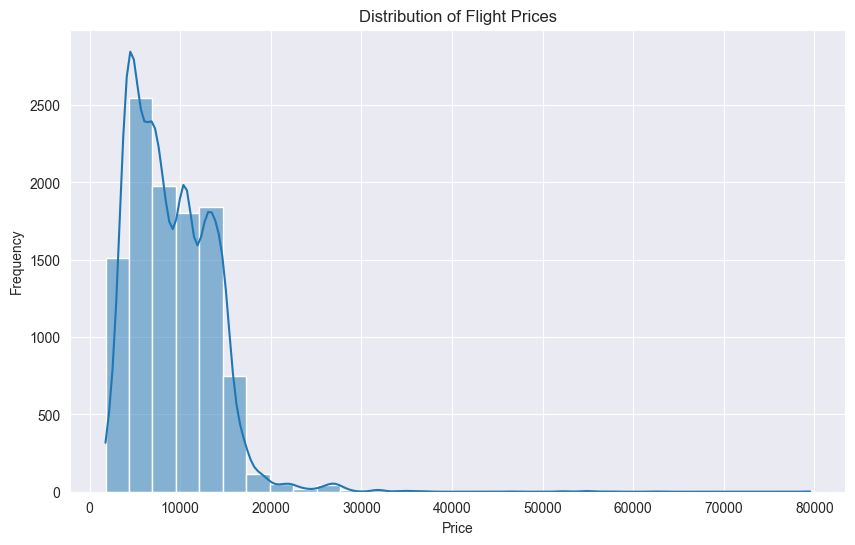

9086.443123303061
8372.0


In [47]:
# Distribution of Flight Prices 

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(df['price'].mean())
print(df['price'].median())

In [ ]:
# flight prices displays some strong right skewness from the visualization, and from the variation of the mean compared to the median
# there is a concentration of lower priced flight tickets 

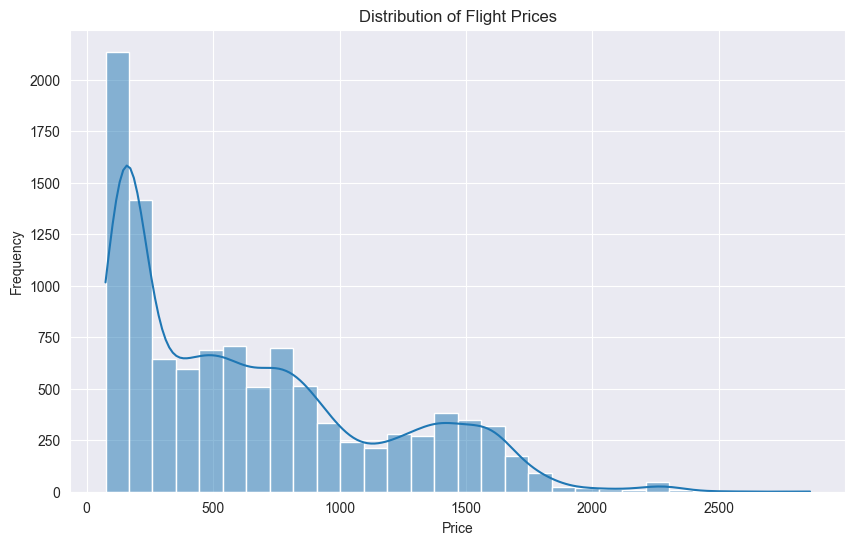

643.080235932965
520.0


In [48]:
# Distribution of Flight Duration Times in Minutes

plt.figure(figsize=(10, 6))
sns.histplot(df['total_dur'], bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(df['total_dur'].mean())
print(df['total_dur'].median())

In [ ]:
# flight durations show a wide range of values, with some right skewness in the distribution, and from the variation of the mean compared to the median
# most flights have shorter duration times

C:\Users\Epicm\AppData\Local\Temp\ipykernel_19100\2565068437.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='total_stops', data=df, palette='viridis')


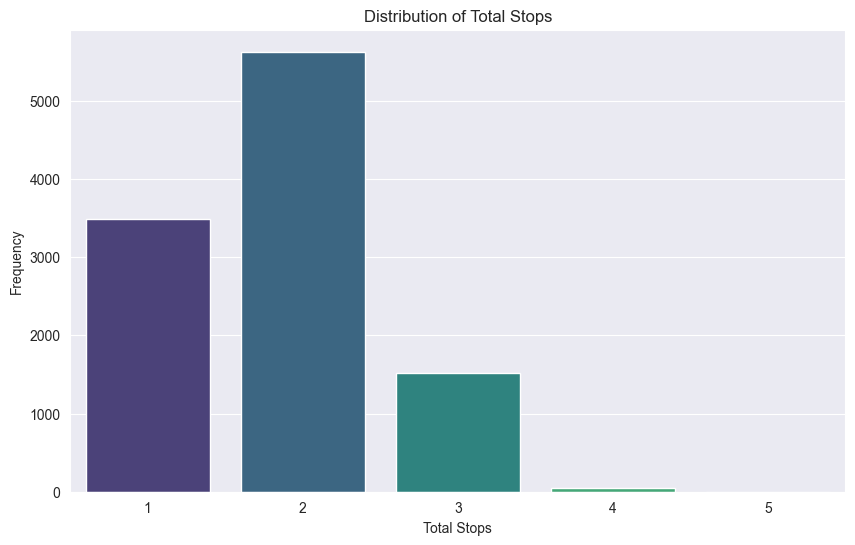

1.8240801423087727
2.0


In [50]:
# Distribution of Total Stops in a Flight

plt.figure(figsize=(10, 6))
sns.countplot(x='total_stops', data=df, palette='viridis')
plt.title('Distribution of Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Frequency')
plt.show()

print(df['total_stops'].mean())
print(df['total_stops'].median())

In [ ]:
# a majority of flights have either 1 or 2 stops.
# direct flights or flights with a single layover

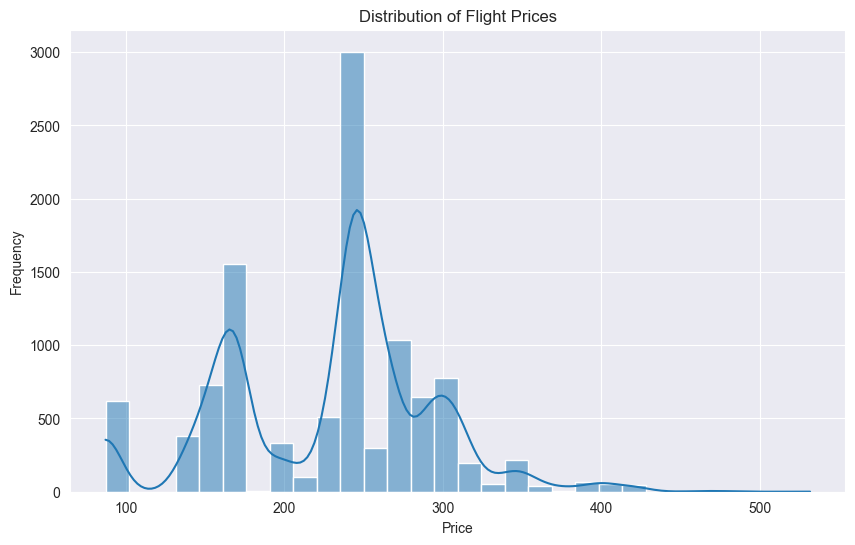

228.94081926062623
246.4066199514213


In [51]:
# Distribution of Flights Total Air Time

plt.figure(figsize=(10, 6))
sns.histplot(df['total_air_time'], bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(df['total_air_time'].mean())
print(df['total_air_time'].median())

In [ ]:
# total air time shows a wide range of times, with some minimal right skewness, but over all a very normal distribution
# a typical flight has total air time between 200 and 300

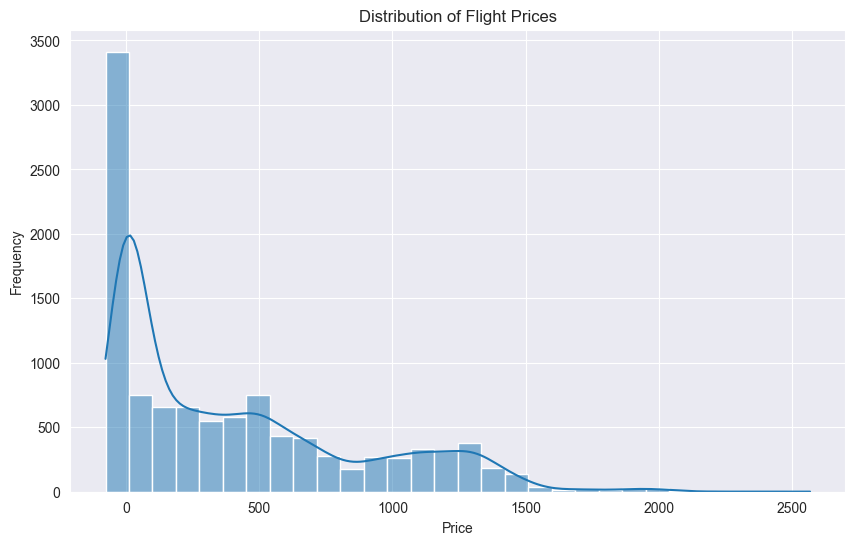

414.1394166723389
263.5933800485787


In [52]:
# Distribution of Flights Total Layover Time

plt.figure(figsize=(10, 6))
sns.histplot(df['layover_time'], bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(df['layover_time'].mean())
print(df['layover_time'].median())

In [ ]:
# flights total layover time displays some right skewness and a wide range of values.
# flights typically have shorter layover times if they experience layovers at all

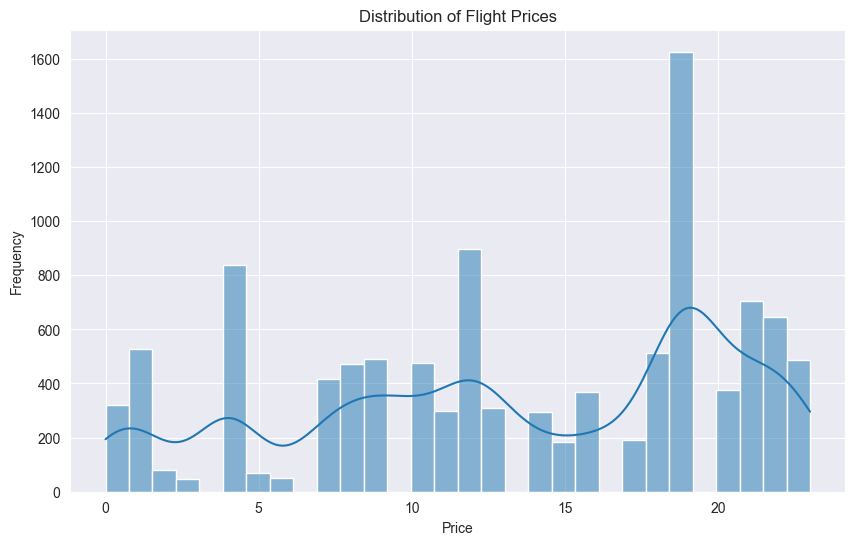

13.348937365415223
14.0


In [53]:
# Distribution of Flights Arrival Hours

plt.figure(figsize=(10, 6))
sns.histplot(df['arv_hour'], bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(df['arv_hour'].mean())
print(df['arv_hour'].median())

In [ ]:
# the range of arrival hours expands throughout the entire day, with peaks in the early morning and late at night.
# the distribution is fairly normal

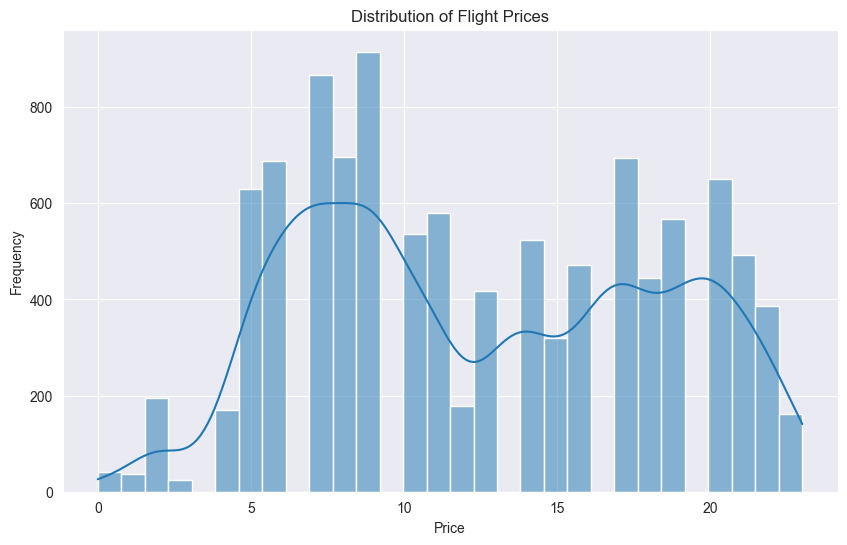

12.490684392847111
11.0


In [54]:
# Distribution of Flights Departure Hours

plt.figure(figsize=(10, 6))
sns.histplot(df['dep_hour'], bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(df['dep_hour'].mean())
print(df['dep_hour'].median())

In [ ]:
# the distribution of departure hours is fairly normal with flights departures peaking in the morning and the evening.

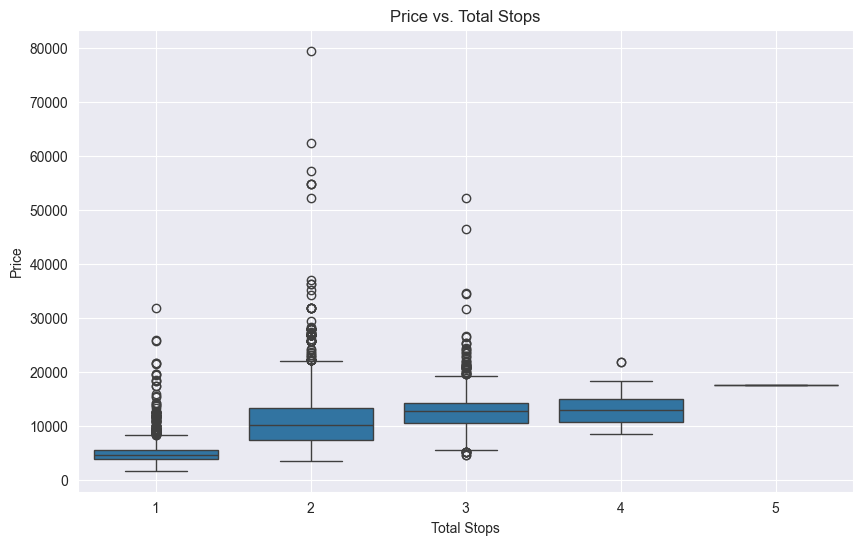

In [20]:
# Price vs. Total Stops

plt.figure(figsize=(10, 6))
sns.boxplot(x='total_stops', y='price', data=df)
plt.title('Price vs. Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [23]:
# Correlation Heatmap

# onehot encoding 'airlines'

df = pd.get_dummies(df, columns=['airline'], drop_first=True)


plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

KeyError: "None of [Index(['airline'], dtype='object')] are in the [columns]"

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['airline_encoded'] = label_encoder.fit_transform(df['airline'])

df = df.drop('airline', axis=1)

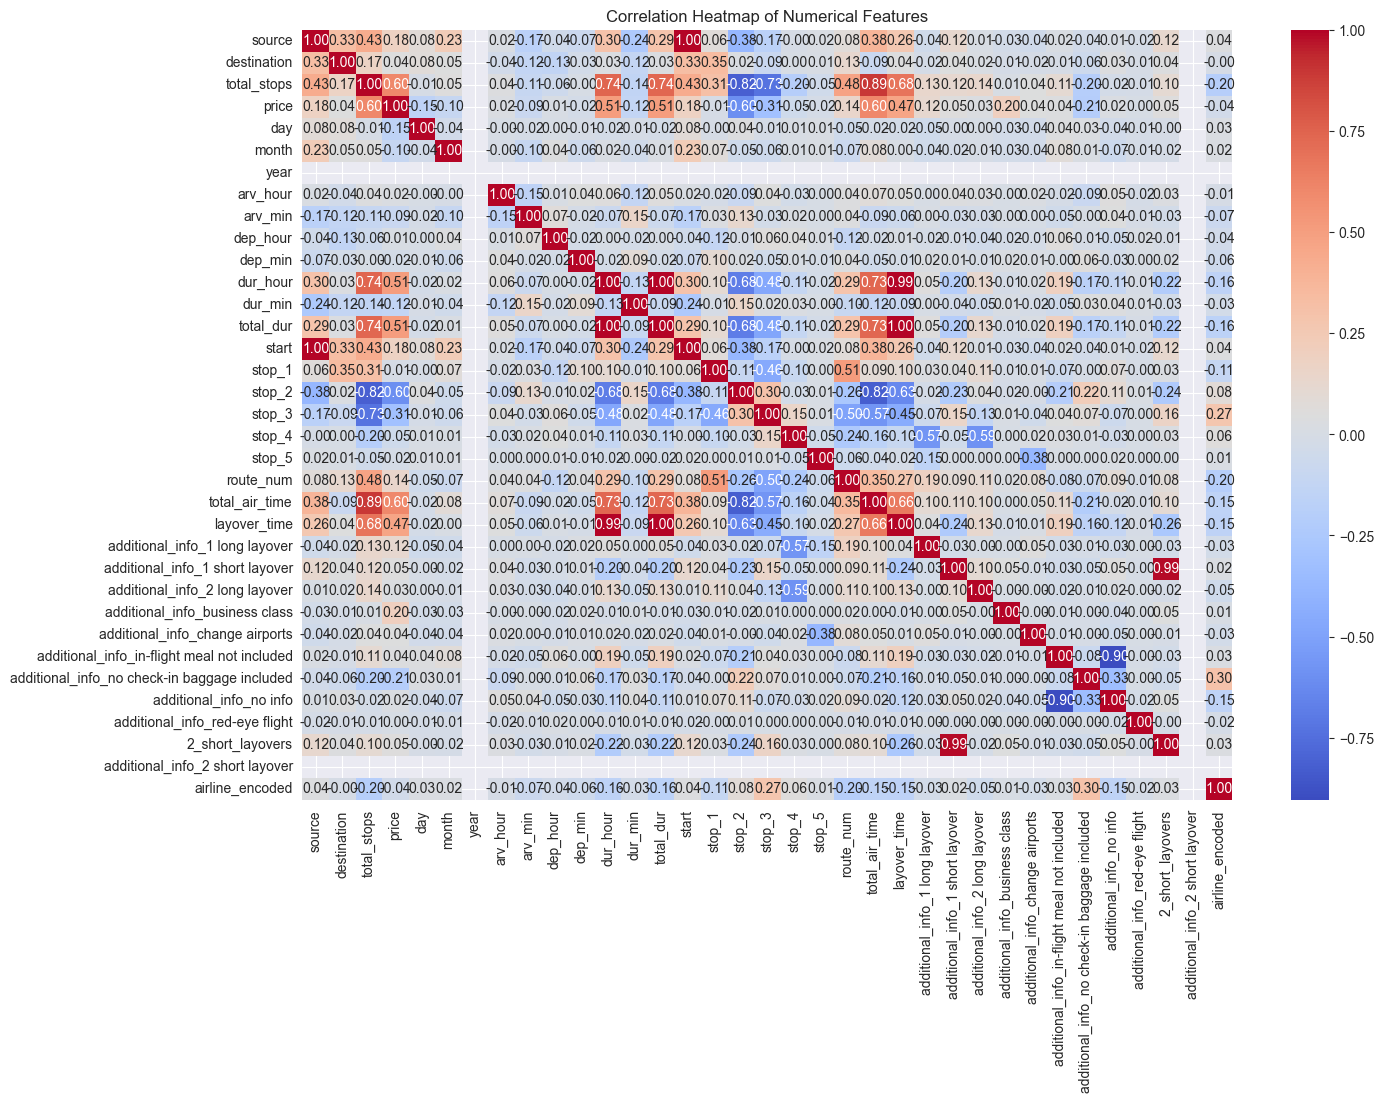

In [33]:
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [34]:
correlation_matrix = df.corr()

# Set a threshold for the correlation coefficient
threshold = 0.6

# Find pairs of features with a correlation coefficient above the threshold
correlated_features = []

for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if row != col and abs(correlation_matrix.loc[row, col]) > threshold:
            correlated_features.append((row, col, correlation_matrix.loc[row, col]))

# Convert the list of tuples to a DataFrame for better readability
correlated_df = pd.DataFrame(correlated_features, columns=['Feature 1', 'Feature 2', 'Correlation'])

correlated_df

,Feature 1,Feature 2,Correlation
0,start,source,1.000000
1,price,total_stops,0.603782
2,dur_hour,total_stops,0.740268
3,total_dur,total_stops,0.738435
4,stop_2,total_stops,-0.819502
5,stop_3,total_stops,-0.725223
6,total_air_time,total_stops,0.890716
7,layover_time,total_stops,0.684885
8,total_stops,price,0.603782
9,stop_2,price,-0.604273


In [36]:
# Detailed correlation analysis

correlation_details = correlation_matrix[['price', 'total_dur', 'total_air_time', 'layover_time']].sort_values(by='price', ascending=False)

correlation_details

,price,total_dur,total_air_time,layover_time
price,1.000000,0.506803,0.599825,0.471697
total_stops,0.603782,0.738435,0.890716,0.684885
total_air_time,0.599825,0.733041,1.000000,0.663301
dur_hour,0.509090,0.999452,0.734245,0.994469
total_dur,0.506803,1.000000,0.733041,0.995245
layover_time,0.471697,0.995245,0.663301,1.000000
additional_info_business class,0.200340,-0.011076,0.000197,-0.012214
start,0.182343,0.289693,0.382558,0.263941
source,0.182343,0.289693,0.382558,0.263941
route_num,0.143185,0.290594,0.351865,0.269329


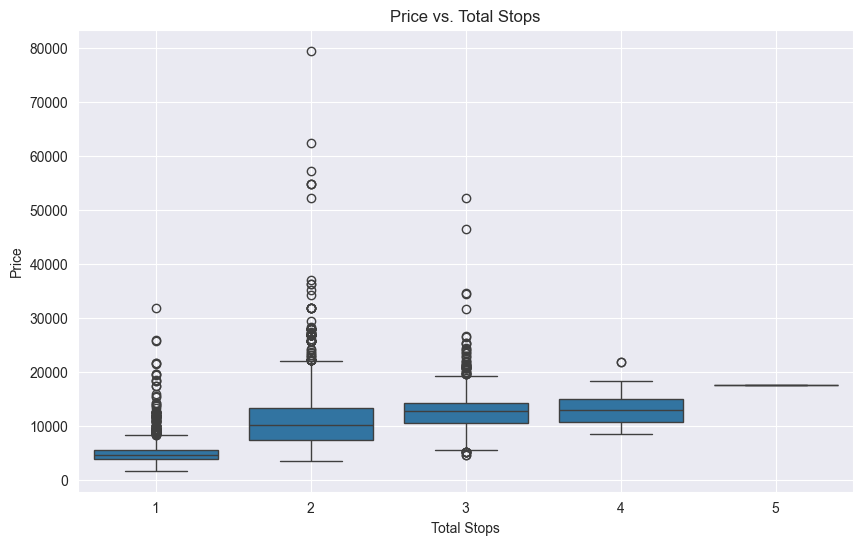

In [55]:
# Price vs. Total Stops

plt.figure(figsize=(10, 6))
sns.boxplot(x='total_stops', y='price', data=df)
plt.title('Price vs. Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
"""
FUTURE FEATURE ENGINEERING 
"""

In [ ]:
#Interaction Terms: Considering interactions between total_stops, price, and airline categories to understand their combined effects on the outcome.

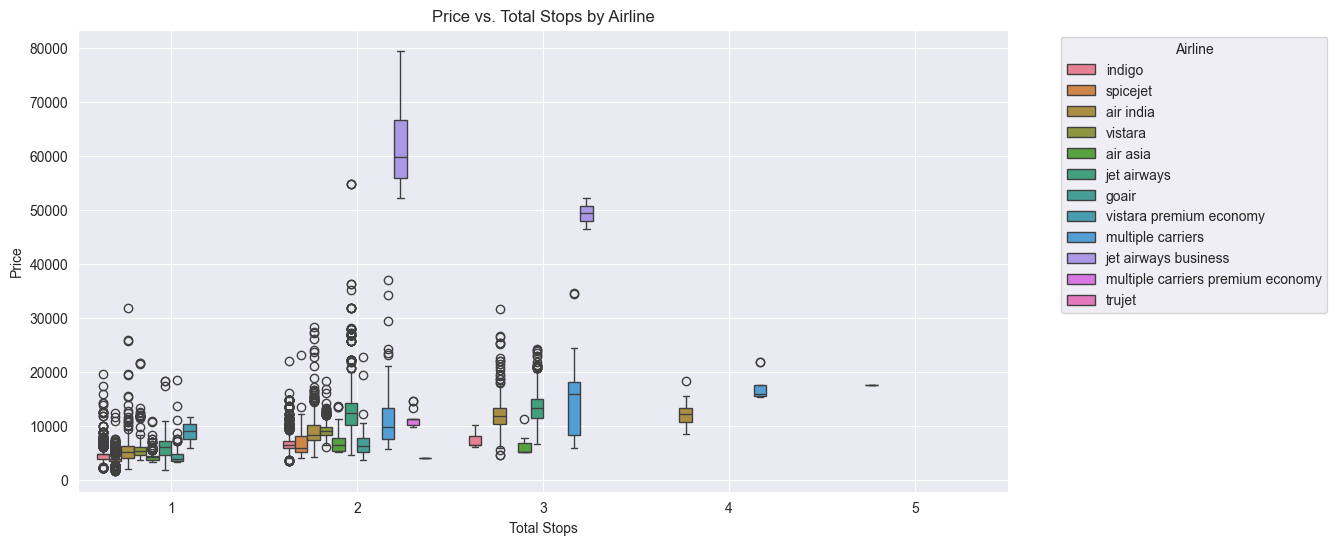

In [56]:
# Plot price vs. total_stops with airline categories as hue

plt.figure(figsize=(12, 6))
sns.boxplot(x='total_stops', y='price', hue='airline', data=df)
plt.title('Price vs. Total Stops by Airline')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [59]:
import statsmodels.formula.api as smf

formula = 'price ~ total_stops * airline'

# Fit the regression model
model = smf.ols(formula=formula, data=df).fit()

# Display the model summary
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     688.7
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:20:13   Log-Likelihood:            -1.0083e+05
No. Observations:               10681   AIC:                         2.017e+05
Df Residuals:                   10660   BIC:                         2.019e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [60]:
summary = model.summary2().tables[1]

# Filter the p-values to get only those below 0.1
significant_p_values = summary[summary['P>|t|'] < 0.1]

significant_p_values

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,2503.873783,482.741486,5.186780,2.178885e-07,1557.610416,3450.137150
airline[T.jet airways],2052.192288,514.074575,3.992013,6.595404e-05,1044.510221,3059.874354
airline[T.jet airways business],87253.876217,6303.178775,13.842837,3.320918e-43,74898.469966,99609.282468
airline[T.multiple carriers premium economy],937.880944,175.703178,5.337871,9.597492e-08,593.469937,1282.291950
airline[T.spicejet],-1643.586833,592.718981,-2.772961,5.564521e-03,-2805.426606,-481.747060
airline[T.vistara premium economy],2172.837862,887.021598,2.449588,1.431793e-02,434.110056,3911.565667
total_stops,2112.783826,309.115061,6.834943,8.652021e-12,1506.860642,2718.707011
total_stops:airline[T.air india],939.842978,321.098347,2.926963,3.430128e-03,310.430318,1569.255639
total_stops:airline[T.jet airways],1400.113765,320.361060,4.370424,1.251796e-05,772.146323,2028.081206
total_stops:airline[T.jet airways business],-15569.533826,2658.122469,-5.857343,4.842363e-09,-20779.949736,-10359.117917


In [62]:
# building the interaction

int_df = df 

int_df['interaction'] = df['total_stops'] * df['airline'] 
int_df.head()

,airline,source,destination,total_stops,price,day,month,year,arv_hour,arv_min,...,additional_info_2 long layover,additional_info_business class,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_no info,additional_info_red-eye flight,2_short_layovers,additional_info_2 short layover,interaction
0,indigo,0,3.0,1,3897,24,3,2019,1,10,...,0,0,0,0,0,1,0,0,NaN,indigo
1,air india,2,0.0,3,7662,1,5,2019,13,15,...,0,0,0,0,0,1,0,0,NaN,air indiaair indiaair india
2,jet airways,3,10.0,3,13882,9,6,2019,4,25,...,0,0,0,0,0,1,0,0,NaN,jet airwaysjet airwaysjet airways
3,indigo,2,0.0,2,6218,12,5,2019,23,30,...,0,0,0,0,0,1,0,1,NaN,indigoindigo
4,indigo,0,3.0,2,13302,1,3,2019,21,35,...,0,0,0,0,0,1,0,1,NaN,indigoindigo


In [65]:
# using the interaction with in a regression model

formula = 'price ~ total_stops + airline + interaction'

# Fit the model
model = smf.ols(formula=formula, data=int_df).fit()

# Get the summary of the model
summary = model.summary2().tables[1]

significant_p_values = summary[summary['P>|t|'] < 0.1]

significant_p_values



,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
airline[T.jet airways],-8.967290e+15,4.464982e+15,-2.008360,0.04463,-1.771949e+16,-2.150923e+14
interaction[T.jet airways],8.967290e+15,4.464982e+15,2.008360,0.04463,2.150923e+14,1.771949e+16
interaction[T.jet airwaysjet airways],8.208157e+15,4.413778e+15,1.859667,0.06296,-4.436705e+14,1.685999e+16


In [ ]:
# moving forward with the results...
# one of the interaction terms has a p_value of .062
# model refinement techniques like regularization with Ridge or Lasso regression to handle some confounding multicollinearity to improve the model robustness

In [ ]:
# outlier detection
# clustering analysis 
# Time Series Analysis 
# transformation of skewed data - advanced feature engineering
# Feature Importance